In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8-whitegrid")

panel_path = Path("../data/processed/panel.csv")
df = pd.read_csv(panel_path)

print(f"Rozmiar danych: {df.shape}")
df.head()


Rozmiar danych: (368, 10)


,year,unit,crime,unemployment,population_density,avg_salary,public_safety_exp,education_exp,migration_balance,tourism_usage
0,2002,Dolnośląskie,41.33,NaN,145.6,2165.84,196377923.0,345259618.0,2572.0,26.9
1,2002,Kujawsko-Pomorskie,38.05,NaN,115.1,1953.39,111821148.0,187401964.0,-2088.0,30.3
2,2002,Lubelskie,29.90,NaN,87.5,1941.01,129845709.0,245911356.0,-8789.0,28.4
3,2002,Lubuskie,42.82,NaN,72.1,1936.54,76681402.0,128709824.0,-1144.0,28.8
4,2002,Mazowieckie,37.88,NaN,144.1,2893.83,280191981.0,414472170.0,12117.0,34.6


In [2]:
# Podstawowe informacje

print("\n--- Podstawowe informacje ---")
print(df.info())
print("\n--- Braki danych (%) ---")
print(df.isna().mean().round(3) * 100)
print("\n--- Statystyki opisowe ---")
display(df.describe().T)


--- Podstawowe informacje ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                368 non-null    int64  
 1   unit                368 non-null    object 
 2   crime               368 non-null    float64
 3   unemployment        336 non-null    float64
 4   population_density  368 non-null    float64
 5   avg_salary          368 non-null    float64
 6   public_safety_exp   368 non-null    float64
 7   education_exp       368 non-null    float64
 8   migration_balance   352 non-null    float64
 9   tourism_usage       368 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 28.9+ KB
None

--- Braki danych (%) ---
year                  0.0
unit                  0.0
crime                 0.0
unemployment          8.7
population_density    0.0
avg_salary            0.0
public_safety_exp     0.0


,count,mean,std,min,25%,50%,75%,max
year,368.0,2.013000e+03,6.642281e+00,2.002000e+03,2.007000e+03,2.013000e+03,2.019000e+03,2.024000e+03
crime,368.0,2.622709e+01,8.279457e+00,1.102000e+01,1.975750e+01,2.518500e+01,3.182250e+01,5.212000e+01
unemployment,336.0,1.100089e+01,5.184745e+00,2.800000e+00,7.000000e+00,1.005000e+01,1.440000e+01,2.920000e+01
population_density,368.0,1.285171e+02,7.390436e+01,5.580000e+01,7.845000e+01,1.156000e+02,1.432750e+02,3.837000e+02
avg_salary,368.0,3.955353e+03,1.647133e+03,1.875410e+03,2.740812e+03,3.553870e+03,4.777583e+03,1.001871e+04
public_safety_exp,368.0,9.258726e+07,5.784664e+07,2.306149e+07,5.642609e+07,7.623670e+07,1.119246e+08,4.442339e+08
education_exp,368.0,4.800491e+08,2.924547e+08,1.062945e+08,2.797403e+08,4.081517e+08,5.901783e+08,2.226515e+09
migration_balance,352.0,0.000000e+00,4.636442e+03,-1.086600e+04,-2.839750e+03,-7.190000e+02,2.244250e+03,1.520600e+04
tourism_usage,368.0,3.474508e+01,6.887368e+00,1.950000e+01,2.984500e+01,3.350000e+01,3.790000e+01,5.790000e+01


In [3]:
print("Zakres lat:", df["year"].min(), "-", df["year"].max())
print("Liczba województw:", df["unit"].nunique())
print("Przykładowe województwa:", df["unit"].unique())

Zakres lat: 2002 - 2024
Liczba województw: 16
Przykładowe województwa: ['Dolnośląskie' 'Kujawsko-Pomorskie' 'Lubelskie' 'Lubuskie' 'Mazowieckie'
 'Małopolskie' 'Opolskie' 'Podkarpackie' 'Podlaskie' 'Pomorskie'
 'Warmińsko-Mazurskie' 'Wielkopolskie' 'Zachodniopomorskie' 'Łódzkie'
 'Śląskie' 'Świętokrzyskie']


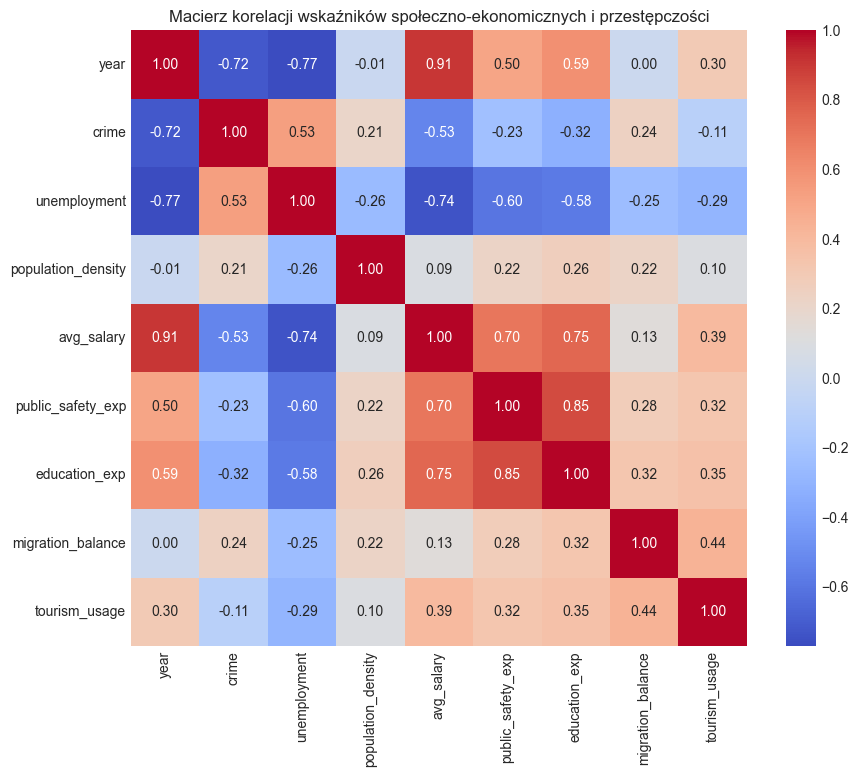

In [4]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Macierz korelacji wskaźników społeczno-ekonomicznych i przestępczości")
plt.show()

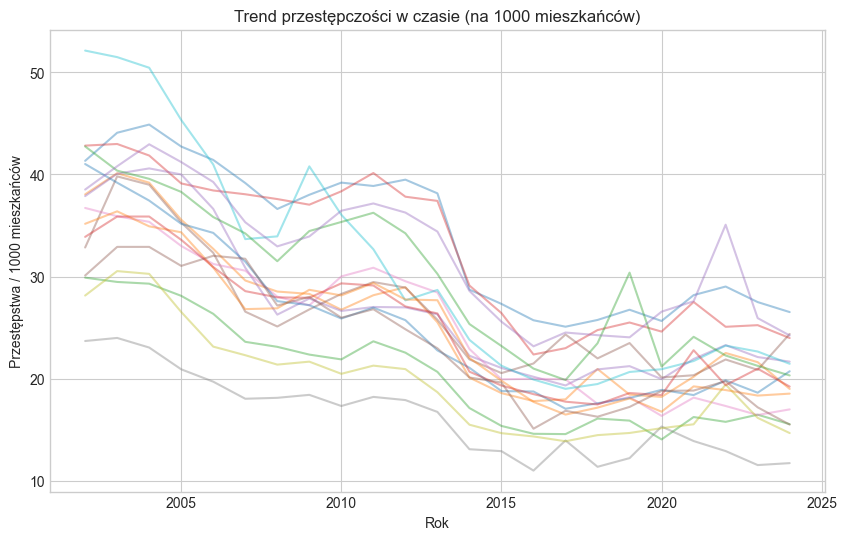

In [5]:
plt.figure(figsize=(10,6))
for region in df["unit"].unique():
    plt.plot(df[df["unit"] == region]["year"], df[df["unit"] == region]["crime"], alpha=0.4)
plt.title("Trend przestępczości w czasie (na 1000 mieszkańców)")
plt.xlabel("Rok")
plt.ylabel("Przestępstwa / 1000 mieszkańców")
plt.show()

C:\Users\Klaudia\AppData\Local\Temp\ipykernel_20624\2958572446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_crime.values, y=mean_crime.index, palette="rocket")


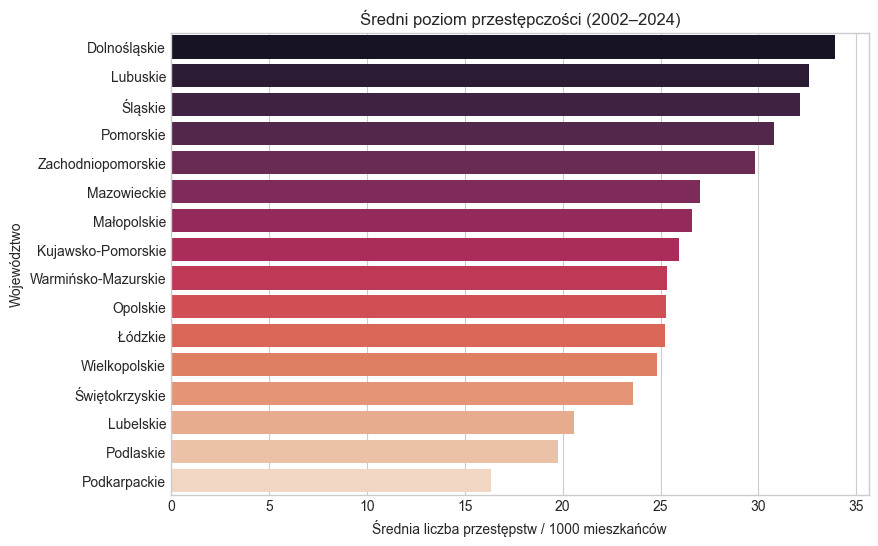

In [6]:
mean_crime = df.groupby("unit")["crime"].mean().sort_values(ascending=False)
plt.figure(figsize=(9,6))
sns.barplot(x=mean_crime.values, y=mean_crime.index, palette="rocket")
plt.title("Średni poziom przestępczości (2002–2024)")
plt.xlabel("Średnia liczba przestępstw / 1000 mieszkańców")
plt.ylabel("Województwo")
plt.show()


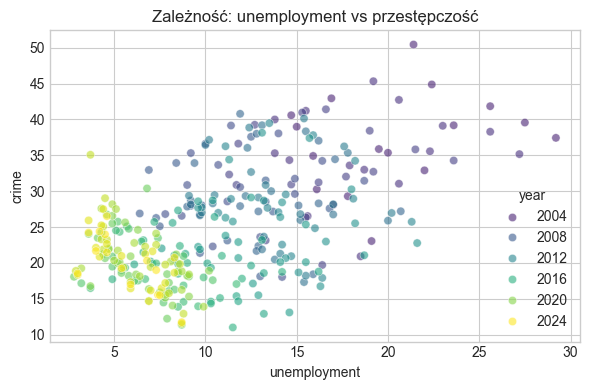

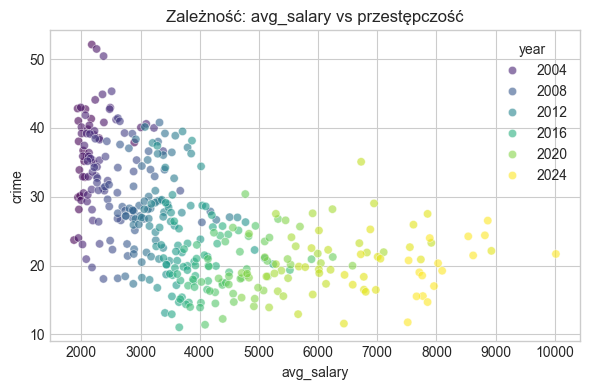

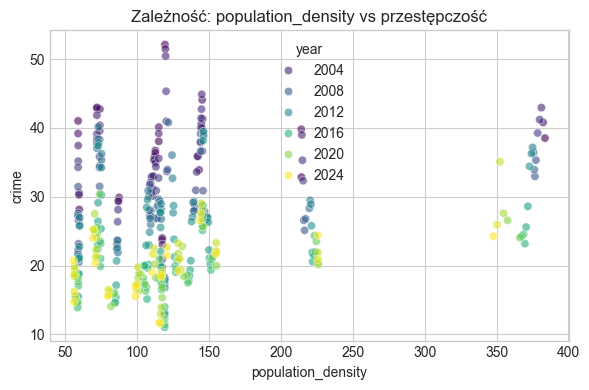

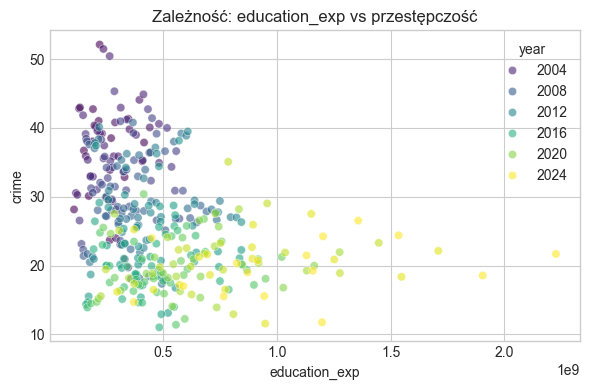

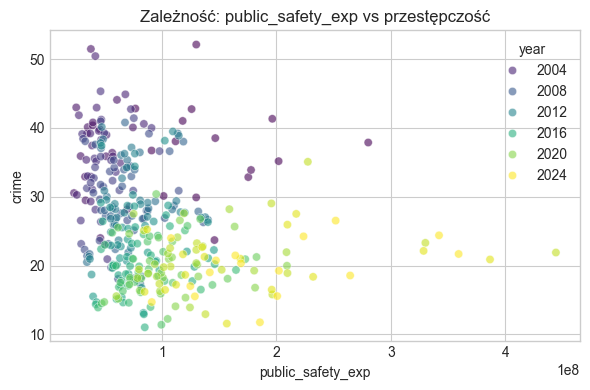

In [7]:
cols_to_plot = ["unemployment", "avg_salary", "population_density", "education_exp", "public_safety_exp"]

for c in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=c, y="crime", hue="year", palette="viridis", alpha=0.6)
    plt.title(f"Zależność: {c} vs przestępczość")
    plt.tight_layout()
    plt.show()

In [8]:
# Korelacja przestępczości z każdą zmienną (średnio po latach)
corr_summary = (
    df.groupby("year")
    .corr()["crime"]
    .reset_index()[["year", "level_1", "crime"]]
    .pivot(index="year", columns="level_1", values="crime")
)

plt.figure(figsize=(10,6))
sns.lineplot(data=corr_summary.drop(columns=["crime"]))
plt.title("Zmienność korelacji z przestępczością w czasie")
plt.ylabel("Współczynnik korelacji Pearsona")
plt.show()

ValueError: could not convert string to float: 'Dolnośląskie'

In [ ]:
# 9️⃣ Podsumowanie
print("Analiza zakończona.")